In [2]:
!python -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.5 MB/s eta 0:00:00m eta 0:00:010:00:010m


In [6]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 7.3 MB/s eta 0:00:00m eta 0:00:010:00:01m


In [8]:
!pip install matplotlib 

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import tensorflow as tf
import os

In [3]:
gpus = tf.config.experimental.list_physical_devices("GPU")

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
import cv2
import imghdr

/tmp/ipykernel_532425/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = "data"
image_exts = ["jpeg", "jpg", "bmp", "png"]

In [28]:
for image in images:
    print(image)

05-12-21-happy-people.jpg
10-Habits-of-Happy-People-Seniors-Today.jpg
1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
11-Habits-of-Truly-Happy-People.jpg
154006829.jpg
163-1635094_happiness-love-clip-art-happy-people-transparent-background.png
170404-happy-workers-feature.jpg
1902539.jpg
1920px-face-smile.svg_.png.jpg
1HEoLBLidT2u4mhJ0oiDgig.png
20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg
2560px-Happy_People.jpg
3BCckliche-menschen-konzept-gruppe-von-jugendlichen-auf-der-suche-nach-unten.jpg
56f455011e0000b300705475.jpeg
7-Habits-of-Happy-People-image.jpeg
7-principles-of-successful-and-happy-people.png
71hBPTAhIXL.jpg
7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg
8e06de1bf2171da2312b6de61c61e4bc.jpg
960x0.jpg
A_Sep20_14_1189155141.jpg
Dollarphotoclub_76084977-1.jpg
GettyImages-565706549-949x534.jpg
GettyImages-871518740.jpg
HAPPY-PEOPLE-CLUB-LOGO.jpg
Happiness-Habits-10-Things-Happy-People-Do-Before-Bed-800x450.jpg
Happy-people-800x533.jpg
Happy-peo

In [6]:
img = cv2.imread(os.path.join("data", "happy", "1902539.jpg"))

print(img)
print(type(img))

[[[109 150 189]
  [109 150 189]
  [107 150 189]
  ...
  [111 152 185]
  [109 150 183]
  [108 149 182]]

 [[110 151 190]
  [110 151 190]
  [108 151 190]
  ...
  [115 156 189]
  [114 155 188]
  [113 154 187]]

 [[110 153 192]
  [110 153 192]
  [110 153 192]
  ...
  [116 157 190]
  [115 156 189]
  [114 155 188]]

 ...

 [[ 14  45  76]
  [ 10  43  76]
  [  7  39  75]
  ...
  [ 64 117 174]
  [ 60 114 174]
  [ 59 114 171]]

 [[ 12  42  71]
  [ 11  42  73]
  [  9  39  74]
  ...
  [ 56 105 161]
  [ 57 107 165]
  [ 60 111 167]]

 [[  7  37  64]
  [ 10  40  69]
  [ 10  38  72]
  ...
  [ 58 105 161]
  [ 55 104 160]
  [ 54 103 159]]]
<class 'numpy.ndarray'>


(1200, 1920, 3)


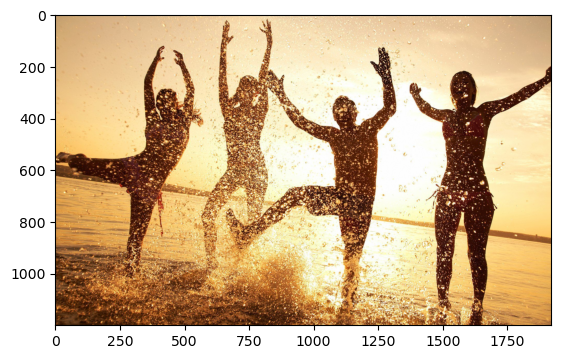

In [7]:
from matplotlib import pyplot as plt
import numpy as np

print(img.shape)

# showing an image
# plt.imshow(img);

# showing a colored image

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [360]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [10]:
data = tf.keras.utils.image_dataset_from_directory("data", batch_size=40, image_size=(128, 128))
data = data.map(lambda x, y: (x/255, y))
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

Found 168 files belonging to 2 classes.


In [11]:
#declaring training, validation & testing data size

training_size = int(len(data)*.7)
valid_size = int(len(data)* .2) + 2
testing_size = int(len(data)*.1) + 1

In [12]:
training_size, valid_size, testing_size

(3, 3, 1)

In [13]:
#declaring training, validation & testing data

training_data = data.take(training_size)
valid_data = data.skip(training_size).take(valid_size)
testing_data = data.skip(training_size + valid_size).take(testing_size)

In [14]:
batch[1].shape
print(batch[0])
print(batch[1])

[[[[0.2137286  0.46483153 0.7255546 ]
   [0.24210157 0.49520528 0.7551164 ]
   [0.26371017 0.5146906  0.7578278 ]
   ...
   [0.3398744  0.5830116  0.8222273 ]
   [0.2987592  0.5536518  0.7957754 ]
   [0.25686586 0.52824444 0.7729473 ]]

  [[0.22901349 0.48201594 0.73299634]
   [0.26470324 0.51035273 0.7631101 ]
   [0.28739133 0.523881   0.7709398 ]
   ...
   [0.3572311  0.6003684  0.8317409 ]
   [0.3209865  0.5719669  0.8132506 ]
   [0.28862426 0.5495804  0.7909287 ]]

  [[0.25571433 0.49446997 0.74960196]
   [0.26724878 0.5225184  0.763511  ]
   [0.30409008 0.5393842  0.7825214 ]
   ...
   [0.3726857  0.615823   0.83935237]
   [0.34139094 0.5888174  0.82760274]
   [0.30670956 0.5655331  0.8028493 ]]

  ...

  [[0.46654412 0.26726386 0.0017772 ]
   [0.5089154  0.28731546 0.00263768]
   [0.5247291  0.29734173 0.        ]
   ...
   [0.         0.12596507 0.28722426]
   [0.         0.11833712 0.27222803]
   [0.         0.10825674 0.25572917]]

  [[0.44937792 0.27034312 0.00100169]
   [0.5

In [366]:
batch[0].max()

1.0

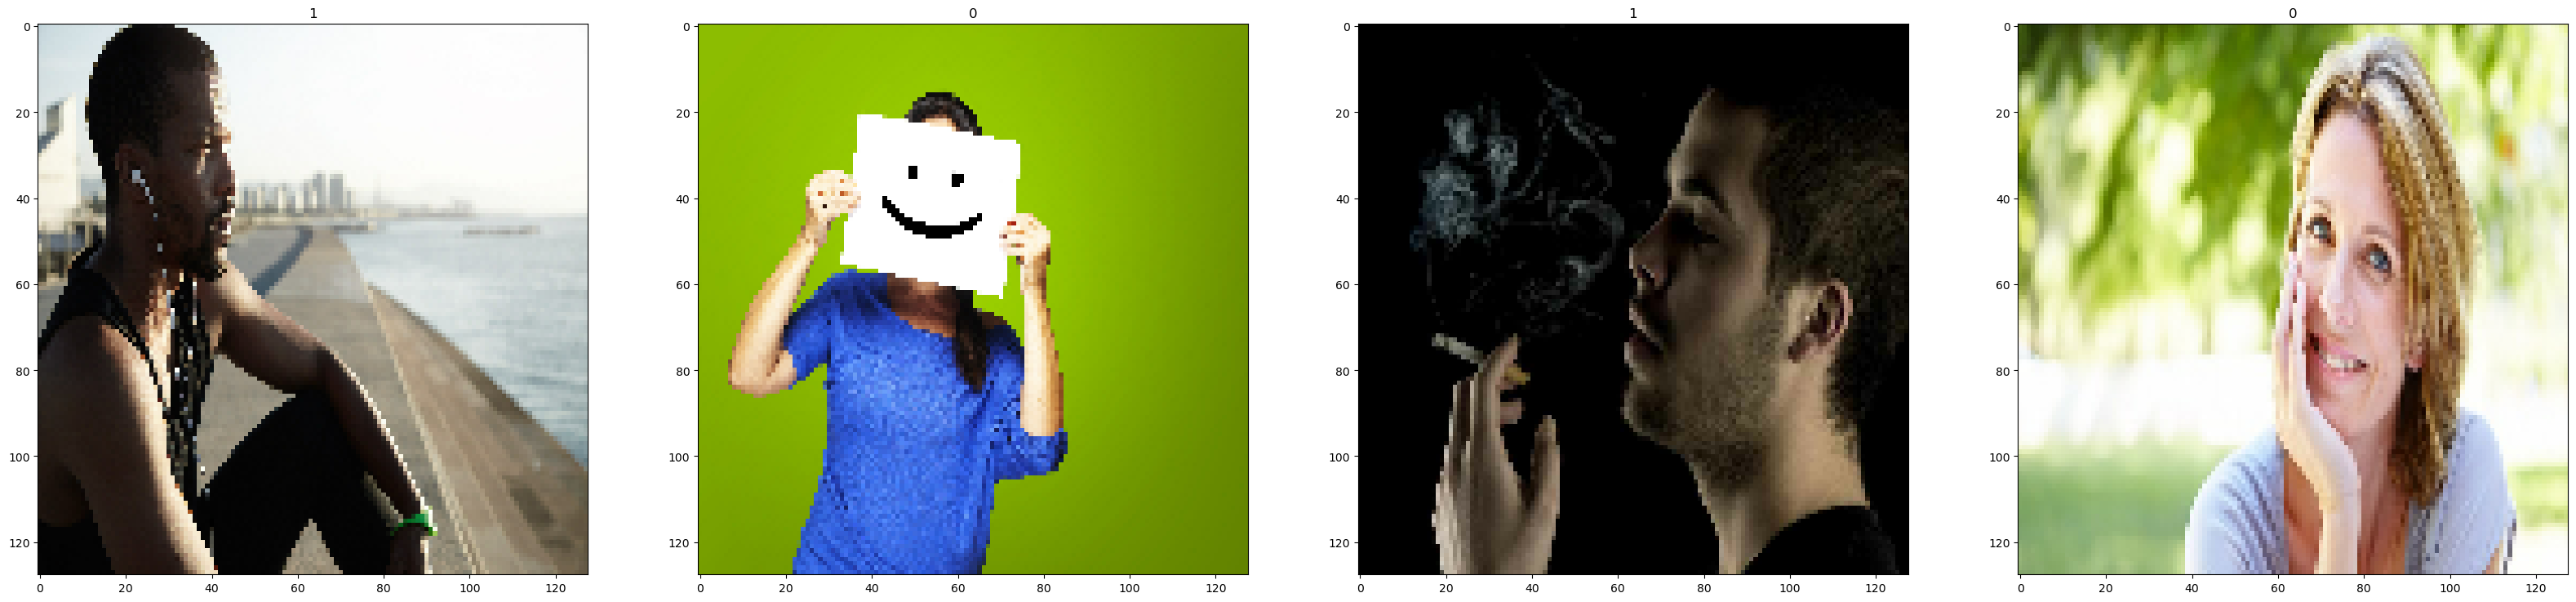

In [367]:
fig, ax = plt.subplots(ncols=4, figsize=(40, 40))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [17]:
#building our model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input

In [30]:
model = Sequential()

In [32]:
#adding layers to our model

model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(16*2, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [33]:
#compiling our model

model.compile('Adam', loss=tf.losses.BinaryCrossentropy(), metrics=['mae'])

In [34]:
#summarizing the model compilation

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
#training our model

logdir = 'logs'

In [36]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
training_data, valid_data, tensorboard_callback

(<_TakeDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_TakeDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <keras.src.callbacks.tensorboard.TensorBoard at 0x7fee4823e780>)

In [37]:
history = model.fit(training_data, epochs=10, validation_data=valid_data, callbacks=[tensorboard_callback])

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 14400, but received input with shape (None, 3136)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 128, 128, 3), dtype=float32)
  • training=True
  • mask=None